In [4]:
# LOAD DATA
import pandas as pd
import datetime
ts = pd.read_csv('/Users/gabeheim/documents/repos/bender/source files/XRPBTC_15m.csv', index_col=False)#.set_index('Open time')
ts['Open time'].divide(10000)
ts['Open time'] = pd.to_datetime(ts['Open time']/1000,unit='s')
ts = ts.set_index('Open time') # Set index
del ts['Close time']
ts.head()

,Open,High,Low,Close,Volume,Number of trades
Open time,,,,,,
2017-11-02 07:45:00,0.000022,0.000022,0.000022,0.000022,100.0,1
2017-11-02 08:00:00,0.000028,0.000028,0.000028,0.000028,6832.0,6
2017-11-02 08:15:00,0.000027,0.000027,0.000025,0.000025,3936.0,6
2017-11-02 08:30:00,0.000026,0.000027,0.000026,0.000026,7125.0,5
2017-11-02 08:45:00,0.000026,0.000026,0.000026,0.000026,19318.0,13


In [24]:
# ADD FEATURES
import talib
from ta import *
import matplotlib.pyplot as plt

indicators = {'rsi': {"b_col": "g", "s_col": "r"}, 'mfi': {"b_col": "p", "s_col": "blue"}}#, 'macd']

ts['RSI'] = rsi(ts["Close"].astype(float), n=14, fillna=True)
ts['MFI'] = talib.MFI(ts["High"], ts["Low"], ts["Close"], ts["Volume"], timeperiod=14)
ts['MACD'] = macd(ts['Close'], n_fast=12, n_slow=26, fillna=False)

# Partitioning for plots
# data = ts.loc['1559952000000':'1559952720000']
data = ts.loc['2018-10-26':'2018-10-30']

ts.tail()

,Open,High,Low,Close,Volume,Number of trades,RSI,MFI,MACD
Open time,,,,,,,,,
2018-10-30 19:15:00,0.00007,0.00007,0.00007,0.00007,360974.0,349,40.630761,56.737167,-7.971564e-08
2018-10-30 19:30:00,0.00007,0.00007,0.00007,0.00007,562108.0,357,40.630761,60.853672,-8.139824e-08
2018-10-30 19:45:00,0.00007,0.00007,0.00007,0.00007,376470.0,341,40.630761,69.370992,-8.178890e-08
2018-10-30 20:00:00,0.00007,0.00007,0.00007,0.00007,503032.0,420,49.695550,76.979570,-7.478114e-08
2018-10-30 20:15:00,0.00007,0.00007,0.00007,0.00007,133113.0,162,40.004773,70.863280,-7.721345e-08


/Users/gabeheim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/gabeheim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


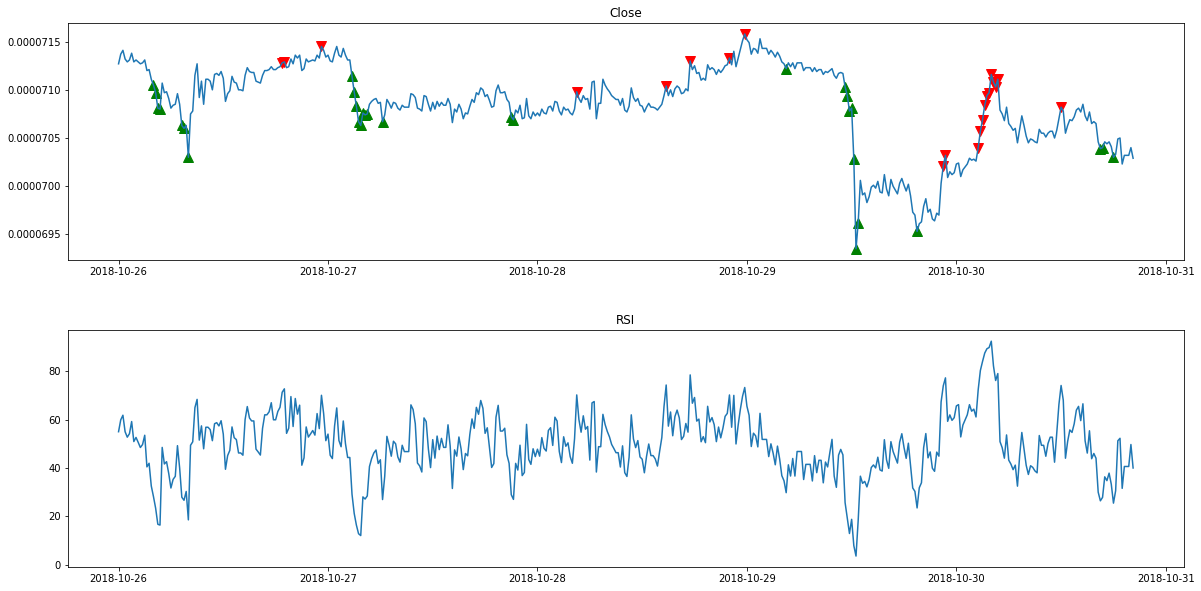

In [25]:
# RSI SIGNALS
buys_rsi = ts.loc[ts['RSI'] <= 30]
indicators['rsi']['buys'] = buys_rsi
sells_rsi = ts.loc[ts['RSI'] >= 70]
indicators['rsi']['sells'] = sells_rsi

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20,10))
ax0.plot(buys_rsi.index, data.loc[buys_rsi.index]['Close'], '^', markersize=10, color='g')
ax0.plot(sells_rsi.index, data.loc[sells_rsi.index]['Close'], 'v', markersize=10, color='r')
ax0.plot(data.index, data['Close'], label='Close')

ax0.set_title('Close')
ax1.plot(data.index, data['RSI'], label='RSI')
ax1.set_title('RSI')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

In [32]:
# MFI SIGNALS
buys_mfi = ts.loc[ts['MFI'] <= 20]
indicators['mfi']['buys'] = buys_mfi
sells_mfi = ts.loc[ts['MFI'] >= 80]
indicators['mfi']['sells'] = sells_mfi

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(20,10))
ax0.plot(buys_rsi.index, data.loc[buys_mfi.index]['Close'], '^', markersize=10, color='g')
ax0.plot(sells_rsi.index, data.loc[sells_mfi.index]['Close'], 'v', markersize=10, color='r')
ax0.plot(data.index, data['Close'], label='Close')

ax0.set_title('Close')
ax1.plot(data.index, data['MFI'], label='MFI')
ax1.set_title('MFI')

# Add a bit more space between the two plots.
fig.subplots_adjust(hspace=0.3)
plt.show()

KeyError: 'mfi'

/Users/gabeheim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """
/Users/gabeheim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


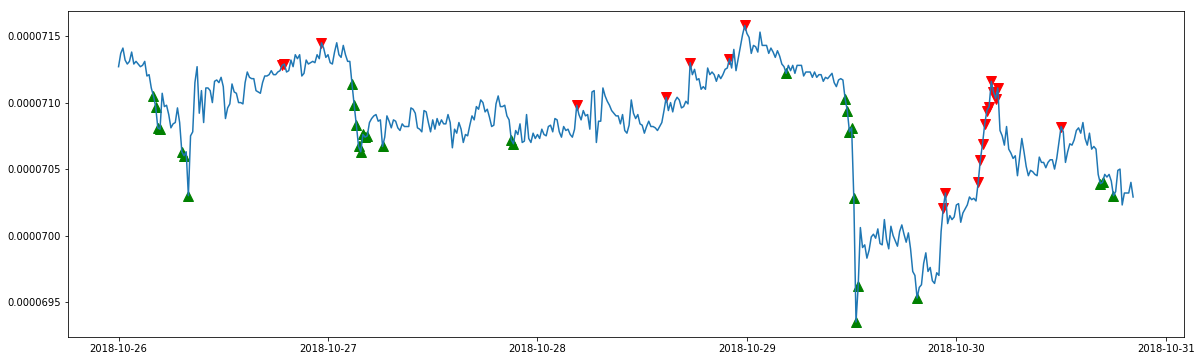

In [31]:
# COMBINED BUY SIGNALS

plt.figure(figsize=(20,6))
for ind in indicators.keys():
    plt.plot(indicators[ind]['buys'].index, data.loc[indicators[ind]['buys'].index]['Close'], '^', markersize=10, color=indicators[ind]['b_col'])
    plt.plot(indicators[ind]['sells'].index, data.loc[indicators[ind]['sells'].index]['Close'], 'v', markersize=10, color=indicators[ind]['s_col'])
plt.plot(data.index, data['Close'], label='Close')

plt.show()